C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10804\4179376837.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  drive = webdriver.Chrome('chromedriver.exe')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10804\4179376837.py:26: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  contents=drive.find_elements_by_css_selector(overlays)


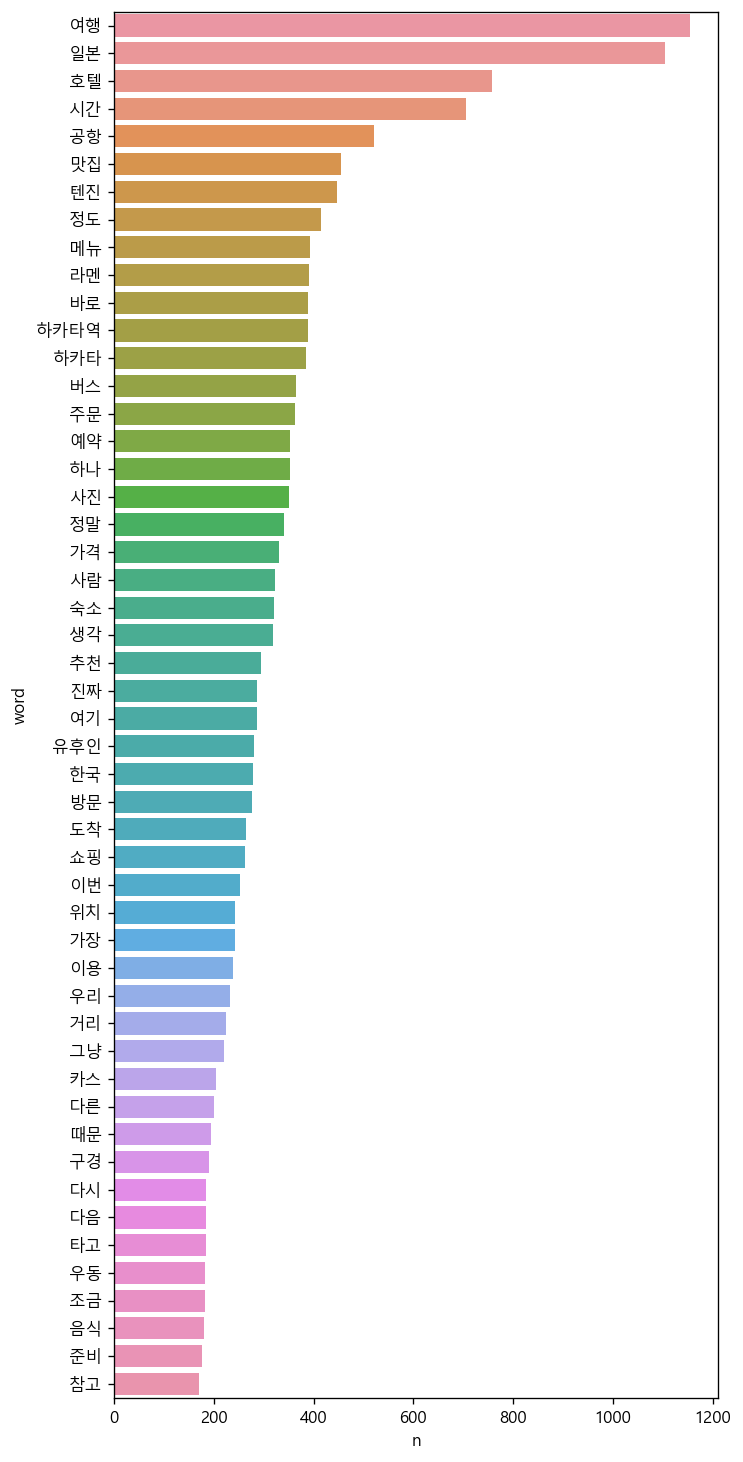

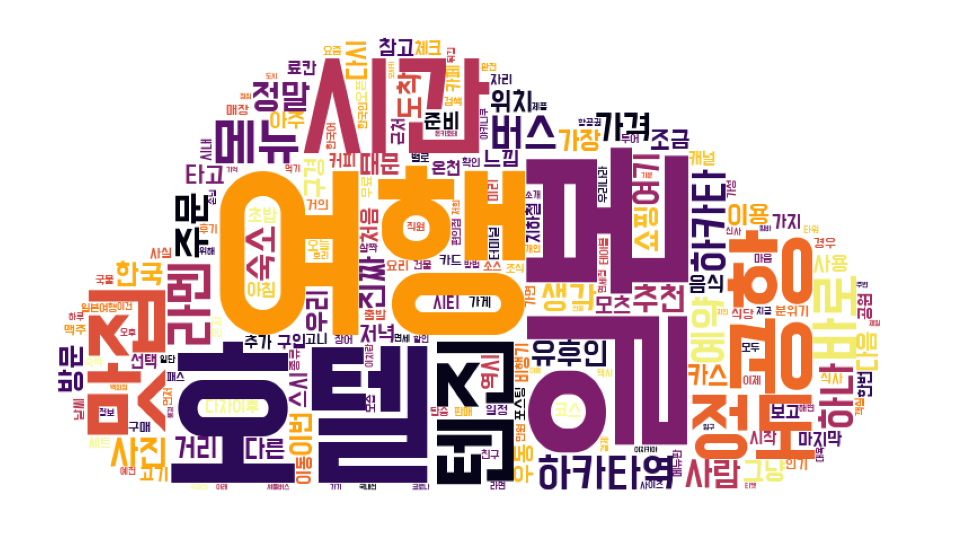

In [6]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import csv
import pandas as pd
import konlpy
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import pyperclip
import matplotlib.pyplot as plt
import PIL
import re

drive = webdriver.Chrome('chromedriver.exe')
lists_url = []
data = pd.read_csv('naver.csv', encoding = "ISO-8859-1")
for i in data:
    for j in range(len(data)):
        lists_url.append(data[i][j])
content=""
for i in lists_url:
    drive.get(i)
    drive.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents=drive.find_elements_by_css_selector(overlays)
    for x in contents:
        content+=x.text
        drive.implicitly_wait(10)
    drive.implicitly_wait(10)


content = re.sub('[^가-힣]',' ',content)

okt=konlpy.tag.Okt()
data=okt.nouns(content)
df_word=pd.DataFrame({'word':data})
df_word['count']=df_word['word'].str.len()
df_word=df_word.query('count>=2')
df_word=df_word.query('word!="후쿠오카"')
df_word.sort_values('count')
df_word = df_word.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)

top20 = df_word.head(50)
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,15]})
sns.barplot(data=top20, y='word', x='n')

font='DoHyeon-Regular.ttf'
dic_word = df_word.set_index('word').to_dict()['n']
#마스크로 사용할 png
icon=PIL.Image.open('Cloud.png')
#불러온 이미지 파일로 mask 만듦
img=PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img=np.array(img)
wc=WordCloud(random_state=1234,
             font_path=font,
             width=400,
             height=400,
             background_color='white',
             mask=img,
             colormap='inferno')
#워드 클라우드 생성
img_wordcloud=wc.generate_from_frequencies(dic_word)
plt.figure(figsize=(10,10)) #가로 세로 크기
plt.axis('off') #테두리 선 없애기
plt.imshow(img_wordcloud) #워드 클라우드 출력


In [8]:
# 네이버 블로그 아이디 크롤링 - 개정, 웹사이트 ver
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import csv
import pandas as pd
import konlpy
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
# 네이버 아이디 복붙용
import pyperclip

drive = webdriver.Chrome('chromedriver.exe')
lists_url = []
data = pd.read_csv('naver.csv', encoding = "ISO-8859-1")
for i in data:
    for j in range(len(data)):
        lists_url.append(data[i][j])
content=""
for i in lists_url:
    drive.get(i)
    drive.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents=drive.find_elements_by_css_selector(overlays)
    for x in contents:
        content+=x.text
        drive.implicitly_wait(10)
    drive.implicitly_wait(10)

import re
content = re.sub('[^가-힣]',' ',content)

Han=konlpy.tag.Hannanum()
data=Han.nouns(content)
df_word=pd.DataFrame({'word':data})
df_word['count']=df_word['word'].str.len()
df_word=df_word.query('count>=2')
df_word=df_word.query('word!="후쿠오카"')
df_word.sort_values('count')
df_word = df_word.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)

top20 = df_word.head(50)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,15]})
sns.barplot(data=top20, y='word', x='n')

font='DoHyeon-Regular.ttf'
dic_word = df_word.set_index('word').to_dict()['n']
import PIL
#마스크로 사용할 png
icon=PIL.Image.open('Cloud.png')
#불러온 이미지 파일로 mask 만듦
img=PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img=np.array(img)
wc=WordCloud(random_state=1234,
             font_path=font,
             width=400,
             height=400,
             background_color='white',
             mask=img,
             colormap='inferno')
import matplotlib.pyplot as plt
#워드 클라우드 생성
img_wordcloud=wc.generate_from_frequencies(dic_word)
plt.figure(figsize=(10,10)) #가로 세로 크기
plt.axis('off') #테두리 선 없애기
plt.imshow(img_wordcloud) #워드 클라우드 출력


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10804\1296469691.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  drive = webdriver.Chrome('chromedriver.exe')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10804\1296469691.py:26: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  contents=drive.find_elements_by_css_selector(overlays)
